### Evaluation Metrics
##### Evaluation metrics deals with assessing the predicted response against the actual value
##### Evaluation metrics gives us a single number which indicates how good the model is performing

### Data Acquisition,Wrangling and model training steps

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [3]:
df = pd.read_csv('customer_churn.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# make the indexes of the column names uniform
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [6]:
# make the string values of rows uniform
strings = list(df.select_dtypes('object'))
strings

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [7]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [8]:
#change totalcharges to numeric type,ignore all non-digit characters
df.totalcharges  = pd.to_numeric(df.totalcharges, errors='coerce')

In [9]:
#fill the null values with 0
df.totalcharges = df.totalcharges.fillna(0)
df.totalcharges.isnull().sum()

0

In [10]:
#turn the churn values into numeric values
df.churn = (df.churn == 'yes').astype(int)

In [11]:
# 60% for training, 20% for validation and 20% for testing
#df is split into 80% for training and 20% for testing 
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [12]:
len(df_full_train), len(df_test)

(5634, 1409)

In [13]:
#split df_full_train into df_val(validation data)
#test size =0.25 because the df_full_train df is 80% of the original df
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)

In [14]:
len(df), len(df_train), len(df_test), len(df_val)

(7043, 4225, 1409, 1409)

In [15]:
#reset the indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
#split the churn column from the rest of the dataframe
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [17]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [18]:
#check for missing values
df_full_train = df_full_train.reset_index(drop=True)

In [19]:
numerical = ['tenure','monthlycharges','totalcharges']

In [20]:
categorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [21]:
#avoid creating sparse matrix
dv = DictVectorizer(sparse= False)

In [23]:
#turn categorical and numerical varaibles into dicts
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

In [24]:
# convert the dicts into vector format
X_train = dv.fit_transform(train_dicts)
X_train.shape

(4225, 45)

In [29]:
model = LogisticRegression(max_iter=len(X_train))

In [30]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=4225)

In [31]:
#for validation data 
val_dict = df_val[categorical + numerical].to_dict(orient = 'records')

In [33]:
X_val = dv.fit_transform(val_dict)

In [35]:
y_pred = model.predict_proba(X_val)[:, 1]

In [36]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [42]:
model_acc = (y_val == churn_decision).mean()
print("Accuracy of model is %.3f" %model_acc)

Accuracy of model is 0.803


### Accuracy and Dummy model
###### we used an classification threshold(decision threshold) value of 0.5(meaning customers with predicted value of 0.5 or higher are considered as churning)

In [43]:
#try different threshold values between 0 and 1
thresholds = np.linspace(0,1,21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [50]:
scores = []
for t in thresholds:
    churn_decision = (y_pred >= t)
    model_acc = (y_val == churn_decision).mean()
    scores.append(model_acc)
    print("For threshold %.2f accuracy of model is %.3f" %(t,model_acc))

For threshold 0.00 accuracy of model is 0.274
For threshold 0.05 accuracy of model is 0.510
For threshold 0.10 accuracy of model is 0.605
For threshold 0.15 accuracy of model is 0.665
For threshold 0.20 accuracy of model is 0.710
For threshold 0.25 accuracy of model is 0.737
For threshold 0.30 accuracy of model is 0.757
For threshold 0.35 accuracy of model is 0.767
For threshold 0.40 accuracy of model is 0.782
For threshold 0.45 accuracy of model is 0.795
For threshold 0.50 accuracy of model is 0.803
For threshold 0.55 accuracy of model is 0.801
For threshold 0.60 accuracy of model is 0.798
For threshold 0.65 accuracy of model is 0.787
For threshold 0.70 accuracy of model is 0.763
For threshold 0.75 accuracy of model is 0.742
For threshold 0.80 accuracy of model is 0.730
For threshold 0.85 accuracy of model is 0.726
For threshold 0.90 accuracy of model is 0.726
For threshold 0.95 accuracy of model is 0.726
For threshold 1.00 accuracy of model is 0.726


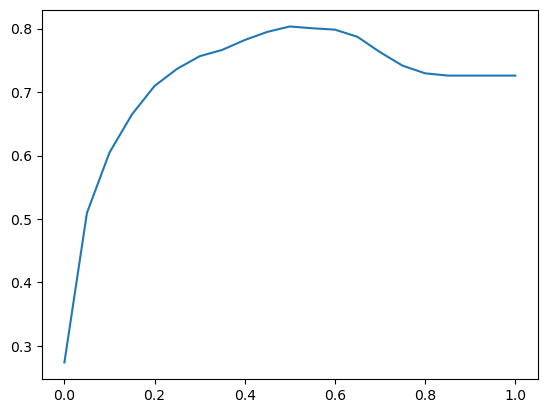

In [49]:
plt.plot(thresholds, scores)

In [51]:
#using accuracy_score function from sklearn
from sklearn.metrics import accuracy_score

In [53]:
#accuracy_score(actual val, predicted val)
#replace churn_decision with y_pred >= 0.5 for better result
acc_score = accuracy_score(y_val, churn_decision)
acc_score

0.7260468417317246

In [54]:
#replace churn_decision with y_pred >= 0.5 for better result
acc_score = accuracy_score(y_val,y_pred >= 0.5 )

In [55]:
acc_score

0.8034066713981547

In [59]:
#checking dummy model for baseline(classification threshold == 1.0)
# when y_pred >= 1.0 -> means no customer is churning
acc_baseline = accuracy_score(y_val, y_pred >= 1.0)
acc_baseline

0.7260468417317246

In [62]:
#count the number of predicted values greater than 1.0
from collections import Counter

In [63]:
Counter(y_pred >= 1.0)

Counter({False: 1409})

In [65]:
Counter(y_val)

Counter({0: 1023, 1: 386})

In [66]:
y_val.mean()

0.2739531582682754

In [67]:
1 - y_val.mean()

0.7260468417317246

### Insight
##### From the above evaluation we can see that accuracy doesn't necessarily indicate how good a model performs 
#### Since in the above dataset we deal with class imbalance(one class has more samples than the other/s)
#### Accuracy doesn't differentiate between errors (false negative and false postive for eg)
##### Differentiating between errors is important because some errors are more costly than the others.

### Confusion Matrix (Confusion Table)
##### Arrange different types of error and accurate outputs in a tabular format